## **Práctica 9: Pronóstico (Regresión lineal múltiple)**

Nombre: Brandon Cervantes Rubí

No. Cuenta: 316136741

Email: mrkyloren117@gmail.com

### **Caso de estudio**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

**Objetivo.** Obtener grupos de pacientes con características similares, diagnosticadas con un tumor de mama, a través de clustering jerárquico y particional.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#### **1) Importar las bibliotecas necesarias y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving WDBCOriginal.csv to WDBCOriginal.csv


{'WDBCOriginal.csv': b'\xef\xbb\xbfIDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension\r\nP-842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871\r\nP-842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667\r\nP-84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999\r\nP-84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744\r\nP-84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883\r\nP-843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613\r\nP-844359,M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742\r\nP-84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451\r\nP-844981,M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389\r\nP-84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243\r\nP-845636,M,16.02,23.24,102.7,79

In [2]:
BCancer = pd.read_csv('WDBCOriginal.csv')
BCancer 

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


#### **2) Gráfica del área del tumor por paciente**


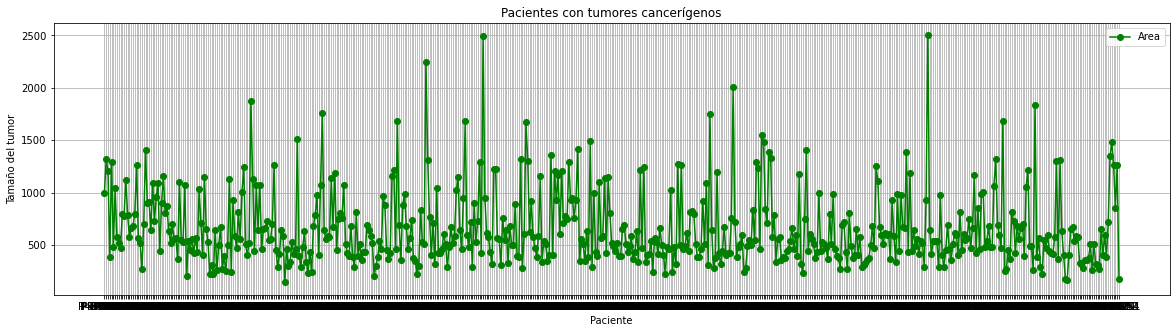

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(BCancer['IDNumber'], BCancer['Area'], color='green', marker='o', label='Area')
plt.xlabel('Paciente')
plt.ylabel('Tamaño del tumor')
plt.title('Pacientes con tumores cancerígenos')
plt.grid(True)
plt.legend()
plt.show()

#### **3) Selección de características**

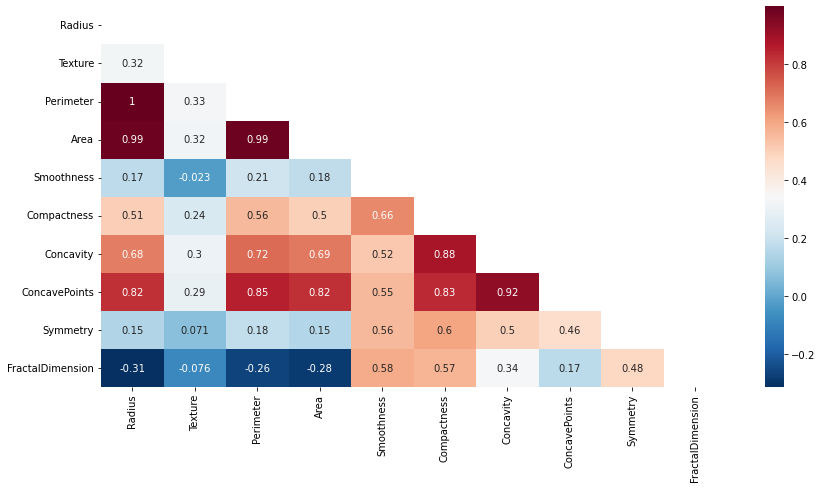

In [4]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(BCancer.corr())
sns.heatmap(BCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show() 

**Varibles seleccionadas:**

1) Textura [Posición 3]

2) Area [Posición 5]

3) Smoothness [Posición 6]

4) Compactness [Posición 7]

5) Symmetry [Posición 10]

6) FractalDimension [Posición 11]

*7) Perimeter [Posición 4] - Para calcular el área del tumor -

#### **4) Aplicación del algoritmo**

In [5]:
#Probar con el perimetro para observar el cambio
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, max_error, r2_score
from sklearn import model_selection

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [13]:
X = np.array(BCancer[['Texture',
                      'Perimeter',
                      'Smoothness',	
                      'Compactness',	
                      'Symmetry',	
                      'FractalDimension']])
pd.DataFrame(X)

X_all = np.array(BCancer[['Radius', 
                          'Texture', 
                          'Perimeter', 
                          'Smoothness', 
                          'Compactness',	
                          'Concavity', 
                          'ConcavePoints', 
                          'Symmetry',	
                          'FractalDimension']])

#Variables predictoras
#['Radius', 'Texture', 'Perimeter', 'Smoothness', 'Compactness',	'Concavity', 'ConcavePoints', 'Symmetry',	'FractalDimension']

#HACER UN MODELO PARA INCLUIR A TODAS LAS VARIABLES

In [14]:
Y = np.array(BCancer[['Area']])
pd.DataFrame(Y)

Y_all = np.array(BCancer[['Area']])
pd.DataFrame(Y)
#Variable pronostico

,0
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


Se hace la división de los datos

In [15]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 1234, 
                                                                    shuffle = True)
#Probar con varias separaciones en test_size
#La semilla para fijar los parametros pseudoaleatorios

X_all_train, X_all_test, Y_all_train, Y_all_test = model_selection.train_test_split(X_all, Y_all, 
                                                                    test_size = 0.2, 
                                                                    random_state = 1234, 
                                                                    shuffle = True)

In [16]:
pd.DataFrame(X_all_train)
#pd.DataFrame(X_all_test)

,0,1,2,3,4,5,6,7,8
0,12.88,18.22,84.45,0.12180,0.16610,0.04825,0.05303,0.1709,0.07253
1,11.13,22.44,71.49,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552
2,12.63,20.76,82.15,0.09933,0.12090,0.10650,0.06021,0.1735,0.07070
3,12.68,23.84,82.69,0.11220,0.12620,0.11280,0.06873,0.1905,0.06590
4,10.57,18.32,66.82,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768
...,...,...,...,...,...,...,...,...,...
450,13.85,15.18,88.99,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853
451,21.37,15.10,141.30,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183
452,12.47,18.60,81.09,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373
453,18.22,18.70,120.30,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310


In [17]:
#pd.DataFrame(Y_train)
pd.DataFrame(Y_all_test)

,0
0,416.2
1,357.6
2,476.7
3,269.4
4,568.9
...,...
109,419.8
110,1094.0
111,551.7
112,565.4


Se entrena el modelo a través de Regresión Lineal Múltiple

In [18]:
RLMultiple = linear_model.LinearRegression()
RLMultiple.fit(X_train, Y_train)                 #Se entrena el modelo

RLMultiple_all = linear_model.LinearRegression()
RLMultiple_all.fit(X_all_train, Y_all_train)                 #Se entrena el modelo con todas las variables

LinearRegression()

Se genera el pronóstico

In [20]:
#Se genera el pronóstico
Y_Pronostico = RLMultiple.predict(X_test)
pd.DataFrame(Y_Pronostico)
#Se genera el pronóstico con todas las variables
Y_all_Pronostico = RLMultiple_all.predict(X_all_test)
pd.DataFrame(Y_all_Pronostico)

,0
0,394.821679
1,344.849158
2,509.816480
3,205.867505
4,591.921320
...,...
109,387.241008
110,1114.810853
111,554.380612
112,579.563925


In [23]:
print('Score con reduccion de variables: %.4f' % r2_score(Y_test, Y_Pronostico))
print('Score con todas las variables: %.4f' % r2_score(Y_all_test, Y_all_Pronostico))

Score con reduccion de variables: 0.9769
Score con todas las variables: 0.9780


#### **5) Obtención de los coeficientes, intercepto, error y Score**

In [16]:
print('Coeficientes: \n', RLMultiple.coef_)
print('Intercepto: \n', RLMultiple.intercept_)
print("Residuo: %.4f" % max_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_test, Y_Pronostico))
#Poner las formulas para la bondad de ajuste

Coeficientes: 
 [[ 6.86261446e-01  1.63885604e+01  2.50787388e+01 -1.40602548e+03
   1.46803422e+02  6.23269303e+03]]
Intercepto: 
 [-1140.33616115]
Residuo: 456.3649
MSE: 3083.2634
RMSE: 55.5271
Score (Bondad de ajuste): 0.9769


#### **6) a. Conformación del modelo de pronóstico**

Y = −1140.34 + 0.69(Texture) + 16.39(Perimeter) + 25.08(Smoothness) − 1406.03(Compactness) + 146.80(Symmetry) + 6232.69(FractalDimension) + 456.36

* Se tiene un Score de 0.9769, el cual indica que el pronóstico del Area del tumor se logrará con un 97.69% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 3083.26 y 55.53 unidades del valor real, esto es, MSE y RMSE, respectivamente.

In [24]:
print('Coeficientes: \n', RLMultiple_all.coef_)
print('Intercepto: \n', RLMultiple_all.intercept_)
print("Residuo: %.4f" % max_error(Y_all_test, Y_all_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_all_test, Y_all_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_all_test, Y_all_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_all_test, Y_all_Pronostico))
#Poner las formulas para la bondad de ajuste

Coeficientes: 
 [[-3.50791485e+01  4.79898821e-01  2.07977713e+01 -1.69885418e+02
  -1.89445108e+03  2.32736426e+02  5.29222459e+02  6.66056252e+01
   5.71643111e+03]]
Intercepto: 
 [-976.18065101]
Residuo: 425.2253
MSE: 2932.7555
RMSE: 54.1549
Score (Bondad de ajuste): 0.9780


#### **6) b. Conformación del modelo de pronóstico (Con todas las variables)**

Y = −976.18 − 35.08(Radius) + 0.48(Texture) + 20.79(Perimeter) − 169.89(Smoothness) − 1894.45(Compactness) + 232.74(Concavity) + 529.22(ConcavePoints) + 66.61(Symmetry) + 5716.43(FractalDimension) + 425.23

* Se tiene un Score de 0.9780, el cual indica que el pronóstico del Area del tumor se logrará con un 97.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 2932.75 y 54.15 unidades del valor real, esto es, MSE y RMSE, respectivamente.

#### **7) Nuevos pronósticos**

In [29]:
AreaTumorID001 = pd.DataFrame({'Texture': [10.38], 
                          'Perimeter': [122.8], 
                          'Smoothness': [0.11840], 
                          'Compactness': [0.2776], 
                          'Symmetry': [0.2419], 
                          'FractalDimension': [0.07871]})

AreaTumorID001_all = pd.DataFrame({ 'Radius': [17.99],
                          'Texture': [10.38], 
                          'Perimeter': [122.8], 
                          'Smoothness': [0.11840], 
                          'Compactness': [0.2776], 
                          'Concavity': [0.30010], 
                          'ConcavePoints': [0.14710],
                          'Symmetry': [0.2419], 
                          'FractalDimension': [0.07871]})

#Variables con las cuales se hace la inferencia

#Herramienta de apoyo para que el medico haga sus pronosticos, no se hace un diagnostico solo se calcula una 
#estimacion del area del tumon en funcion de otras variables
print('Valor real: 1001')
print('Prediccion con reduccion de variables: %.4f' % RLMultiple.predict(AreaTumorID001))
print('Prediccion con todas las variables: %.4f' % RLMultiple_all.predict(AreaTumorID001_all))

Prediccion con reduccion de variables: 1018.0461
Prediccion con todas las variables: 1019.4241
